In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.linalg as sla

In [2]:
# Set up a simple sine wave.
x = np.linspace(start = 0, stop = 2 * np.pi, num = 50)
y = np.sin(x)

<IPython.core.display.Javascript object>


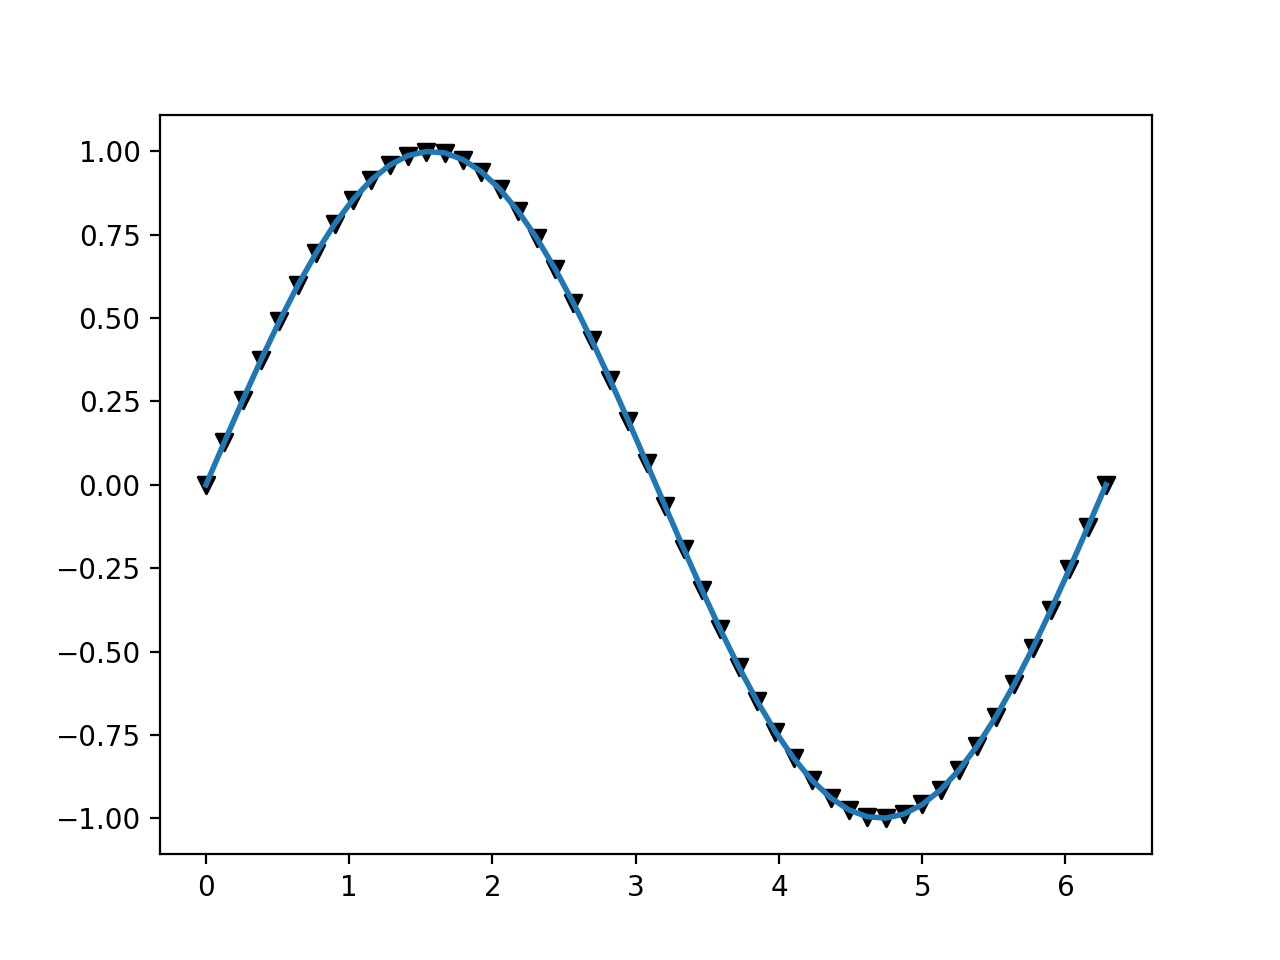

In [3]:
plt.scatter(x, y, c = 'black', marker = 'v')
plt.plot(x, y, lw = 2.0)

## Setting up an autoregressive model

Let's say now that we're only working with the triangles, and have **no knowledge** of the whole sine wave thing (i.e., that there's a function which, given an $x$-value, gives us *precisely* the $y$-value we're looking for. Remember: this is machine learning, so we're trying to *learn* the function!)

We employ the *Markov assumption*: that any observation (a triangle up there) can be computed simply by knowing the *previous* triangle, given some change. That gives us, basically, a line:

$x_{t + 1} = ax_{t}$

Given that we know the previous value, $x_t$, we can multiply by it some unknown parameter $a$ (the slope?), and get the next value, $x_{t + 1}$.

It might look something like this:

$$x_2 = ax_1 \\
x_3 = ax_2 \\
x_4 = ax_3 \\
... \\
x_{50} = ax_{49}$$

It *looks* a lot like your standard "two knowns and one unknown", except all 50 equations share the same $a$. It's unlikely we'd get a value that *exactly* solved all the equations, so we have to do what's called a "best fit": the value of $a$ that most closely satisfies all these equations.

In [4]:
a, *_ = sla.lstsq(y[:-1, np.newaxis], y[1:])
print(a)

[ 0.99179001]


... well, that's disappointing. $a \approx 1$. 

If we tried using this to make predictions, we'd end up with something pretty boring.

<IPython.core.display.Javascript object>


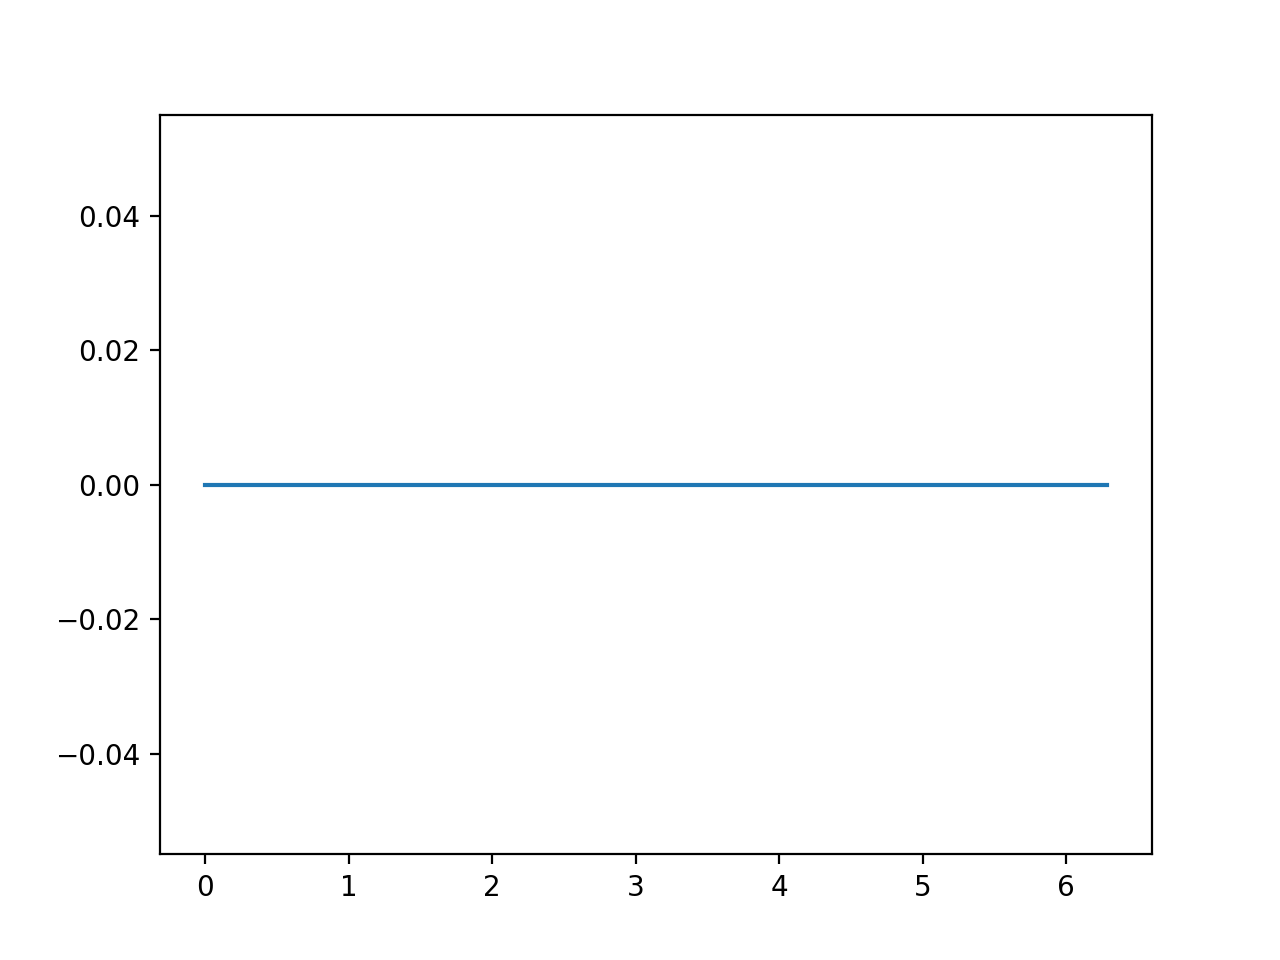

In [5]:
y_predict = [x[0]]
while len(y_predict) < y.shape[0]:
    y_predict.append(y_predict[-1] * a)
plt.plot(x, y_predict)

### Anyone know why?

Because the sine wave is perfectly symmetric.

There are exactly two possible values of $sin(x)$ every $2\pi$: a negative and a positive value. This dependency on only 1 previous data point makes things ambiguous: were we going *down* or *up*?

How would we solve this?

### Add a second dependency!

Now it would look something like this:

$$
x_3 = a_1x_1 + a_2x_2 \\
x_4 = a_1x_2 + a_2x_3 \\
x_5 = a_1x_3 + a_2x_4 \\
... \\
x_{50} = a_1x_{48} + a_2x_{49}
$$

The math to solve this gets a *little* trickier, but still essentially the same idea.

In [6]:
d = np.vstack([y[2:], y[1:-1]])
a1, a2 = (y[np.newaxis, :-2] @ sla.pinv(d))[0]

Now, let's try prediction again!

<IPython.core.display.Javascript object>


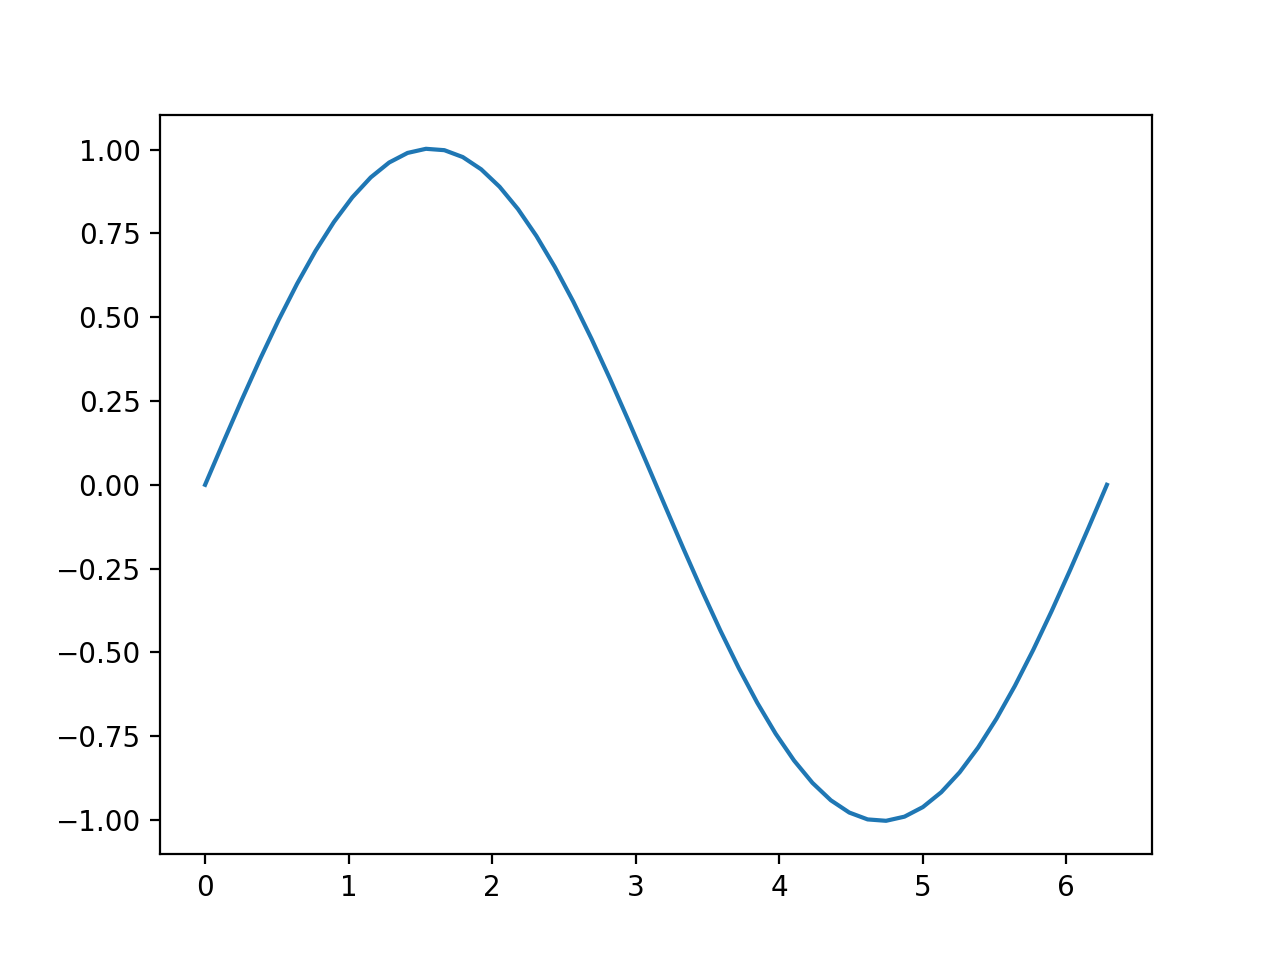

In [7]:
y_predict = [x[0], x[1]]
while len(y_predict) < y.shape[0]:
    y_predict.append((y_predict[-2] * a1) + (y_predict[-1] * a2))
plt.plot(x, y_predict)

Just to check, let's overlay the original plot and see how far off we were.

<IPython.core.display.Javascript object>


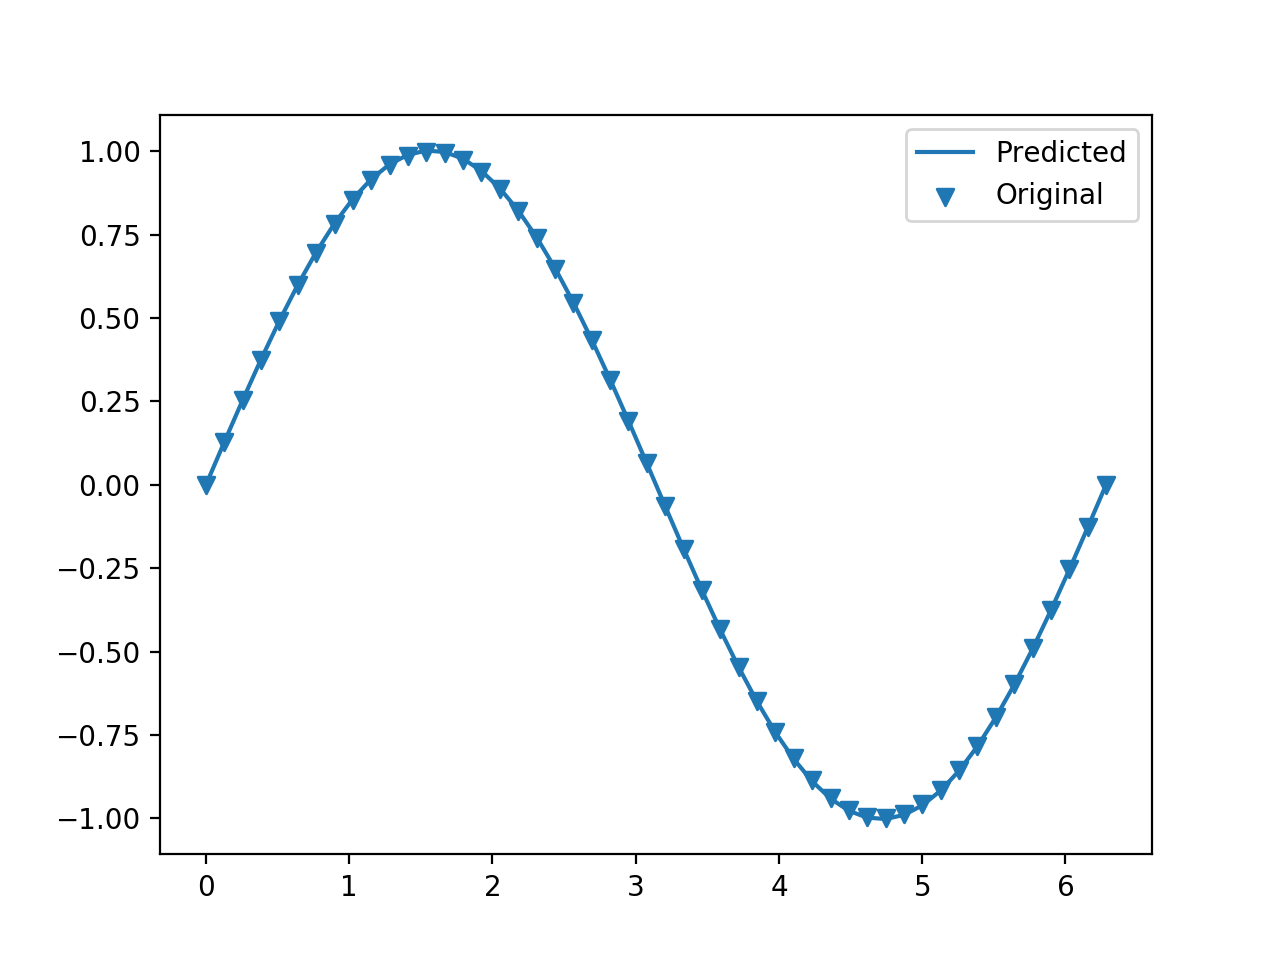

In [8]:
plt.scatter(x, y, marker = 'v', label = "Original")
plt.plot(x, y_predict, label = "Predicted")
plt.legend(loc = 0)

And now the punchline:

### The $a_1$, $a_2$, etc work extremely well as features!